In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Importing important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nilearn

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [3]:
# Importing Dataset

from nilearn.datasets import fetch_abide_pcp
from nilearn.connectome import ConnectivityMeasure

data = fetch_abide_pcp(derivatives=['rois_ez'], SITE_ID=['NYU']) # Extracting fMRI data from NYU repository wrt AAL atlas

In [4]:
# Pre-processing the data

conn_est = ConnectivityMeasure(kind='correlation') # Connectivity Estimator
conn_matrices = conn_est.fit_transform(data['rois_ez'])

Text(0.5, 1.0, 'Connectivity matrix')

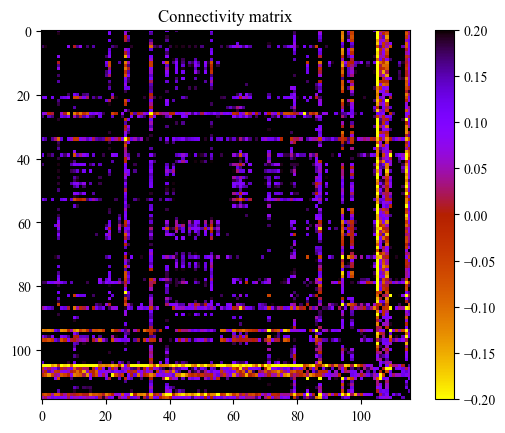

In [5]:
plt.imshow(conn_matrices[4], vmax=.20, vmin=-.20, cmap='gnuplot_r')
plt.colorbar()
plt.title('Connectivity matrix')

In [6]:
# conn_matrices is a matrix that contains the correlation of different ROIs for each sample
# conn_matrices[i][j][k] -> correlation between ROI j and ROI k for subject i

# It is to note that connectivity matrices are symmetric matrices. Let flatten this matrix into a vector

sym_vec_matrices = [conn_matrix[np.triu_indices_from(conn_matrix, k=1)] for conn_matrix in conn_matrices]# Converting sym. matrix into vector
X=sym_vec_matrices
#print(X.shape)

In [7]:
y = data.phenotypic['DX_GROUP']
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [8]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [9]:
y[y == 2] = -1
print(y)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


In [10]:
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.model_selection import cross_validate

In [11]:
lr_ = [0.00001, 0.0001, 0.001, 0.01, 0.1]
architecture = {'0 hidden layer': (),
                '1 hidden layer with 2 nodes': (2,),
                '1 hidden layer with 6 nodes': (6,),
                '2 hidden layers with 2 and 3 nodes': (2, 3) 
                ,
                '2 hidden layers with 3 and 2 nodes': (3, 2),
                '2 hidden layers with 8 and 4 nodes': (8, 4),
                '3 hidden layers with 4 nodes each': (4, 4, 4)}

In [12]:
l=[]
acc = dict()

for foo in architecture.keys():
    
    cur_acc = dict()
    
    for lr in lr_:
        clf = MLP(hidden_layer_sizes=architecture[foo], solver='adam', learning_rate_init=lr, max_iter=3000)
        cv_results = cross_validate(clf, X, y, cv=5)
        score = np.mean(cv_results['test_score'])
        cur_acc[lr] = score
        print(score)
    acc[foo] = cur_acc

0.49949579831932767
0.5289075630252101
0.5868907563025211
0.5290756302521008
0.5692436974789916
0.5058823529411764
0.6447058823529411
0.5593277310924369
0.5640336134453782
0.5702521008403362
0.5815126050420167
0.5868907563025211
0.5986554621848741
0.5692436974789916
0.5811764705882353
0.5235294117647059
0.5230252100840336
0.5408403361344538
0.4996638655462185
0.5576470588235295
0.5119327731092437
0.540672268907563
0.5752941176470588
0.5455462184873949
0.5514285714285714
0.5408403361344537
0.5465546218487395
0.6620168067226891
0.622016806722689
0.5176470588235293
0.5458823529411764
0.5517647058823529
0.6157983193277311
0.5408403361344538
0.535126050420168


In [45]:
max_acc=max(l)
min_acc=min(l)
mean_acc=sum(l)/len(l)
print(max_acc,min_acc,mean_acc)

0.6564705882352941 0.5290756302521009 0.0


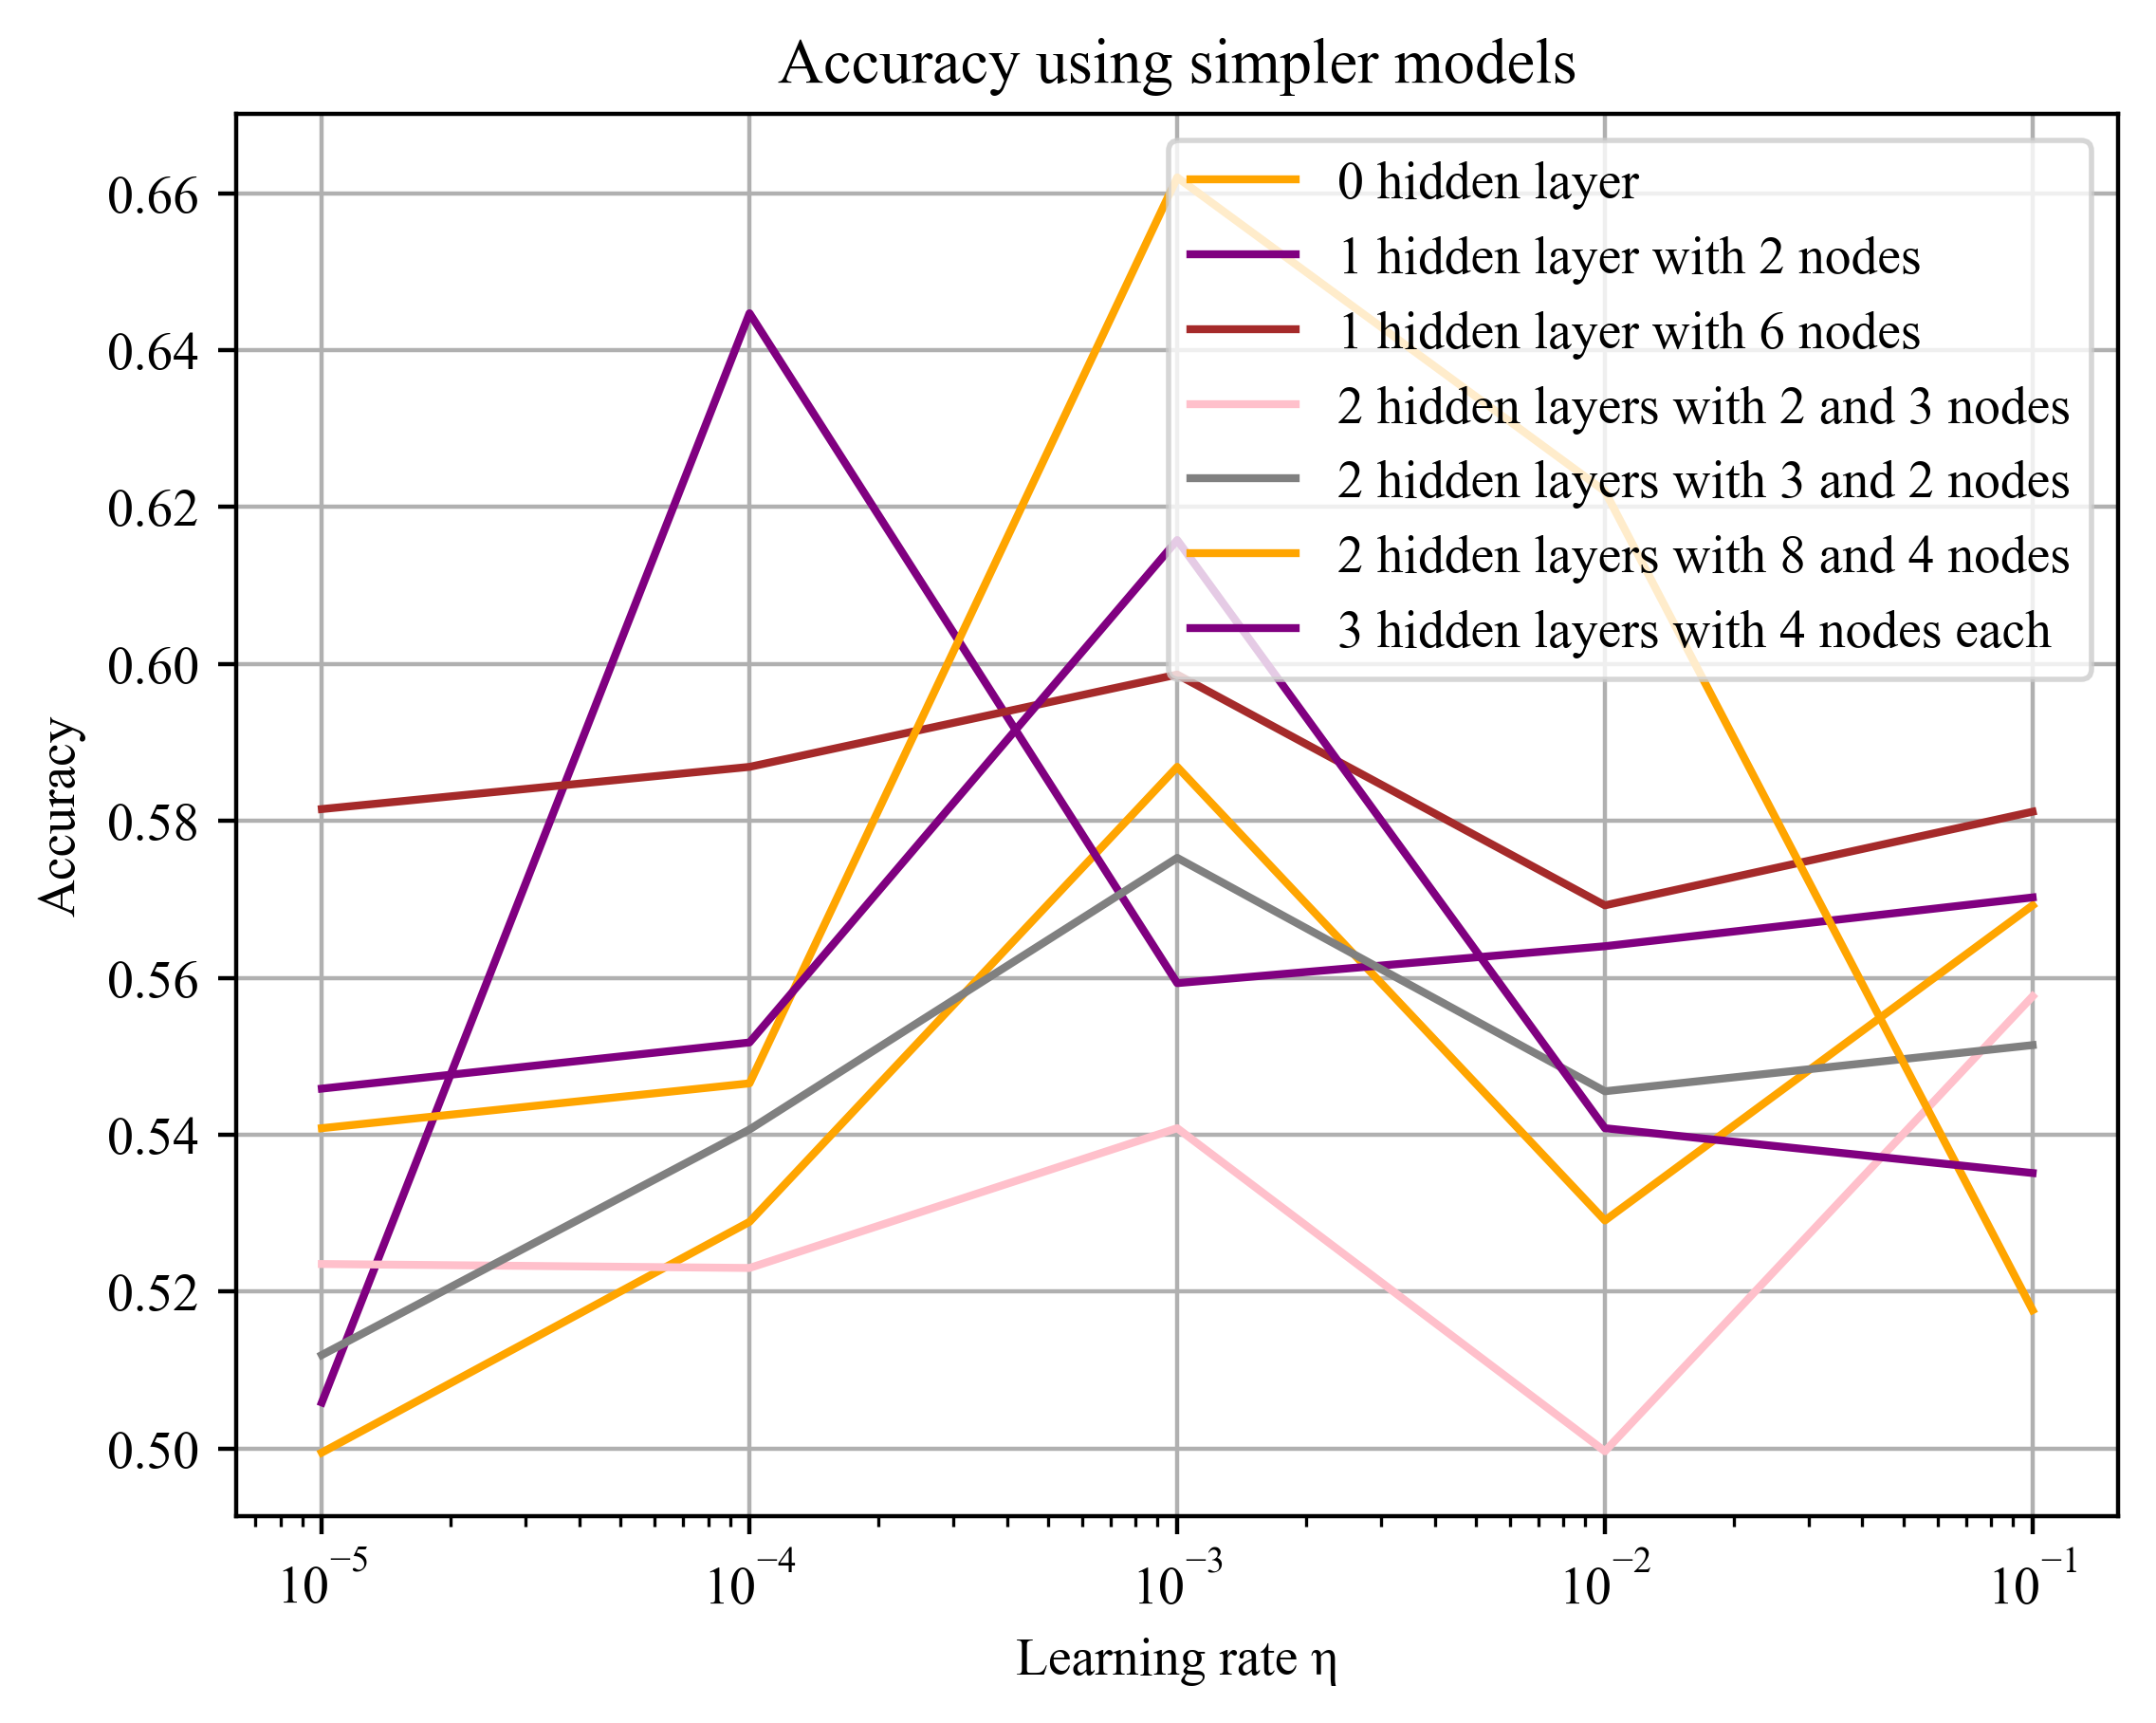

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'acc' is a dictionary with architecture keys and corresponding accuracy values
result = pd.DataFrame(acc)

# Set a new color cycle
new_colors = ['orange', 'purple', 'brown', 'pink', 'gray']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=new_colors)

plt.figure(dpi=400)
plt.xlabel('Learning rate η')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.grid()

for foo in architecture.keys():
    plt.plot(result[foo], label=foo)

plt.title('Accuracy using simpler models')
plt.legend()
plt.show()
